In [1]:
from classification_models import Classifier
from data_processing import read_data, split_data
from learning_misclassification import get_misclassifications, learn_from_misclassified

import warnings

In [2]:
warnings.filterwarnings('ignore')

## Dataset
Function **read_data** is used to read the data from the file located at the path provided. Here, I have used the ***vehicles.csv*** dataset.

In [3]:
X, y,class_map, _, _ = read_data('../../datasets/vehicles.csv')

,Mapping
0,bus
1,opel
2,saab
3,van


## Splitting the data
The given dataset is split into training and test data, and the slpit is the default setting of the function, that is ***25%*** of the data is the ***training data*** and ***75%*** of the data is the ***test data***.

In [4]:
X_train, X_test, y_train, y_test = split_data(X, y)

# Experiment
## Plots:
The function ***learn_from_misclassified*** shows multiple plots which include the following:
- Confusion matrix 
- Predicted Probability plotted against Sample indices to evaluate the distances of the samples from the decision boundary, the points are colour coded as per their true label and hence can be interpreted appropriately by comparing the colour with the probability for that sample in the class under consideration
- The above is plotted with correctly classified points as well to show the rough probability bands formed by the correcty classified samples
- 4 plots, one for each class depicting the distances of misclassified points from the class mean with a reference line drawn depicting the average distance of the correctly classified samples from the class mean

## Observations:
- We notice the single misclassification in class 0 easily and can understand that the point is classified as class 2 due to high probability predicted. This information combined with the succeeding plot of distances from class mean, it appears as though the points do not lie in a close cluster and may possibly be spread out in the higher dimensional space in such a way that the class mean is close to the misclassified point, however the hyperplane acting as the decision boundary could be one that does not include the class mean itself.
- We can also explain the misclassifications of some other points as being quite far from the class mean ad hence posibly on the other side of the one vs all decision boundary.
- We notice that, some of this information however is not helpful. For example, in the case of the distance plot for class 1 and 2, we notice a fairly equal distribution of misclassified points above and below the reference line, as a result of which we cannot infer much using these plots.
- We notice some bands in the probability plot of the misclassified points in their true class plots. This indicates that the misclassified samples may possibly have similar characteristics owing to the misclassification. They could possibly be at a larger distance from the correctly classified samples, and the dataset could be such that it has a gap comparably large gap between the correctly classified and misclassified samples, i.e., similar to 2 clusters formed by samples, but of the same class. 

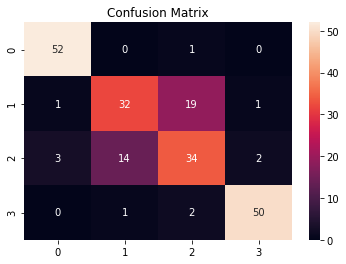

Predicted Probability vs Misclassified Sample Indices
Note: Legend colour indicates the true class of the point


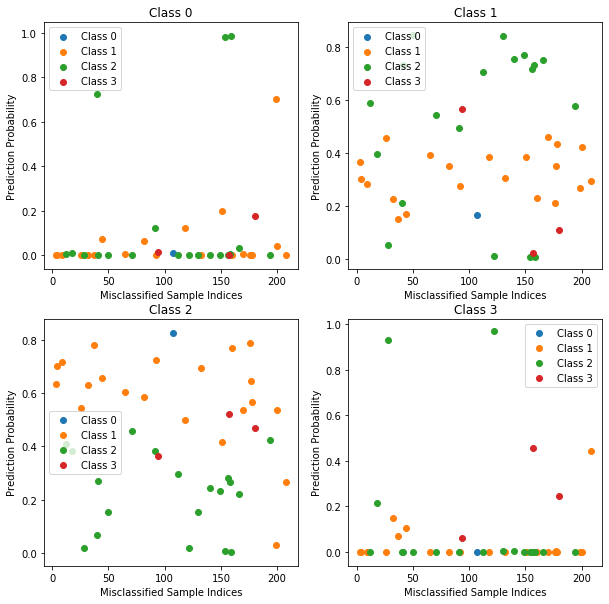

Predicted Probability vs Correctly Classified Sample Indices
Note: Legend colour indicates the true class of the point


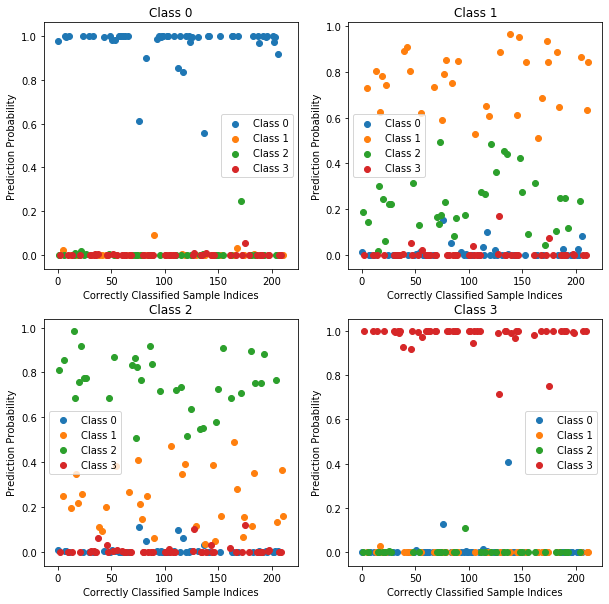

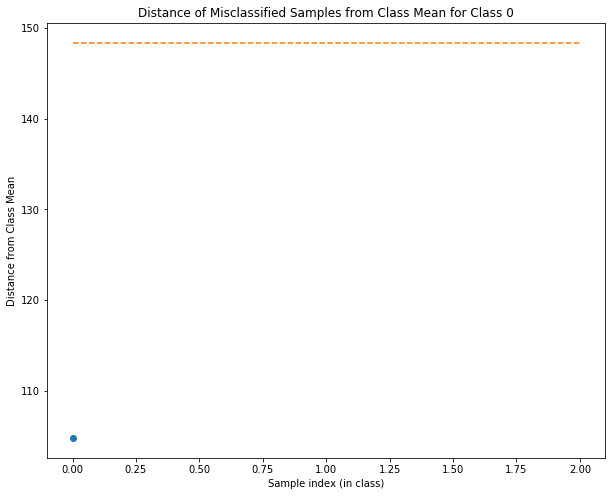

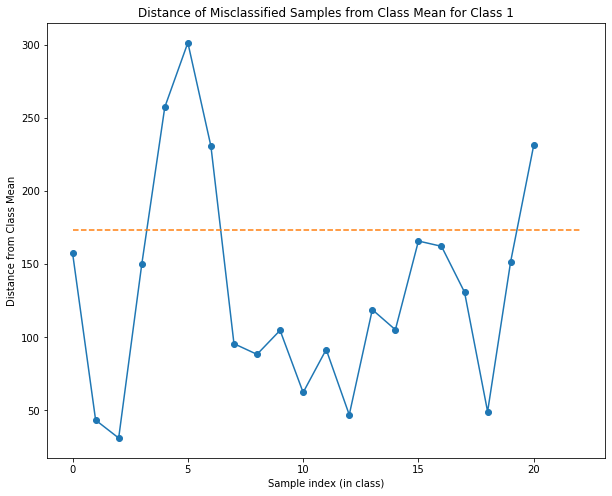

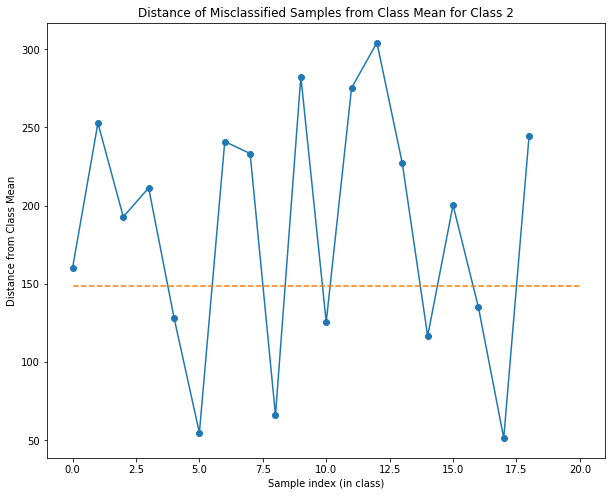

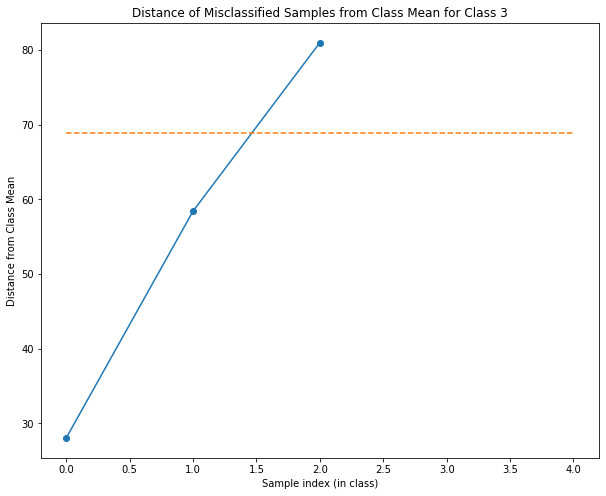

In [5]:
model = Classifier(model='logistic', solver='newton-cg', multi_class='multinomial')
model.train(X_train, y_train)
model.validate(X_test, y_test)
model.confusion_matrix()
learn_from_misclassified(model=model, X=X_test, y=y_test)